### Dirichlet Distribution
- cate 분포에서 모수값인 theta 벡터에 대한 추정을 분포로 나타낸 것이다.
- dir분포의 모수값인 alpha값을 임의 조절하여 추정하는 방식
- alpha값을 동일하게 세팅하면 uniform 분포를 띈다.

In [4]:
%matplotlib inline

##### K=3, x+y+z = 1, 균등하게 뽑는 분포

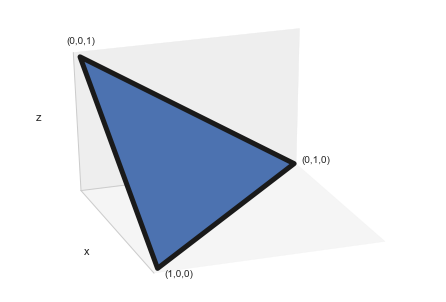

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

fig = plt.figure()
ax = Axes3D(fig)
x = [1, 0, 0]
y = [0, 1, 0]
z = [0, 0, 1]
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, edgecolor="k", lw=5, alpha=0.4))
ax.text(1, 0, 0, "(1,0,0)", position=(1.1, 0))
ax.text(0, 1, 0, "(0,1,0)", position=(0, 1.04))
ax.text(0, 0, 1, "(0,0,1)", position=(-0.2, 0))
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.view_init(30, -20)
tmp_planes = ax.zaxis._PLANES
# set origin ( http://stackoverflow.com/questions/15042129/changing-position-of-vertical-z-axis-of-3d-plot-matplotlib )
ax.yaxis._PLANES = (tmp_planes[2], tmp_planes[3],
                    tmp_planes[0], tmp_planes[1],
                    tmp_planes[4], tmp_planes[5])
ax.zaxis._PLANES = (tmp_planes[2], tmp_planes[3],
                    tmp_planes[0], tmp_planes[1],
                    tmp_planes[4], tmp_planes[5])
plt.show()

In [6]:
# 생성된 점을 2차원 삼각형 위에 찍어주는 함수
def plot_triangle(X, kind):
    n1 = np.array([1, 0, 0])
    n2 = np.array([0, 1, 0])
    n3 = np.array([0, 0, 1])
    n12 = (n1 + n2) / 2
    m1 = np.array([1, -1, 0])
    m2 = n3 - n12
    m1 = m1 / np.linalg.norm(m1)
    m2 = m2 / np.linalg.norm(m2)

    X1 = (X - n12).dot(m1)
    X2 = (X - n12).dot(m2)

    g = sns.jointplot(X1, X2, kind=kind, xlim=(-0.8, 0.8), ylim=(-0.45, 0.9))
    g.ax_joint.axis("equal")
    plt.show()

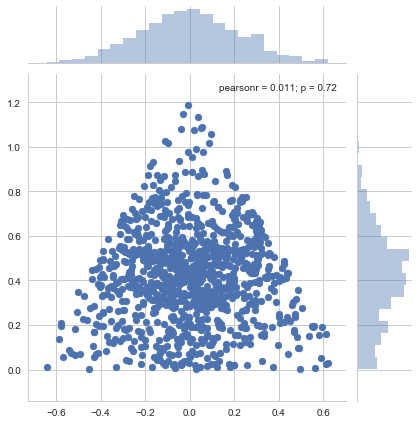

In [7]:
# 단순하게 0~1사이 숫자3개를 랜덤으로 뽑아 3개의 합으로 각각 나눠준 걸 가지고
# 위의 삼각형에 점을 찍으면 중심극한정리에 의해 한쪽(중앙)으로 점이 쏠린 
# 정규 분포 형태로 그래프가 나타난다.
np.random.seed(0)
X1 = np.random.rand(1000, 3)
X1 = X1 / X1.sum(axis=1)[:, np.newaxis]
plot_triangle(X1, kind="scatter")

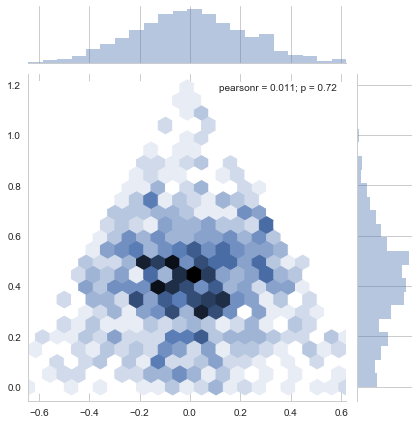

In [8]:
plot_triangle(X1, kind="hex")

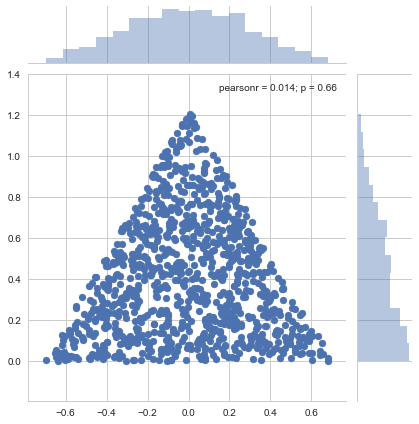

In [9]:
# dirchlet분포로 alpha값을 동등하게 부여하면 골고루 생플 생성이 가능하다.(uniform)
X2 = sp.stats.dirichlet((1,1,1)).rvs(1000)
plot_triangle(X2, kind="scatter")

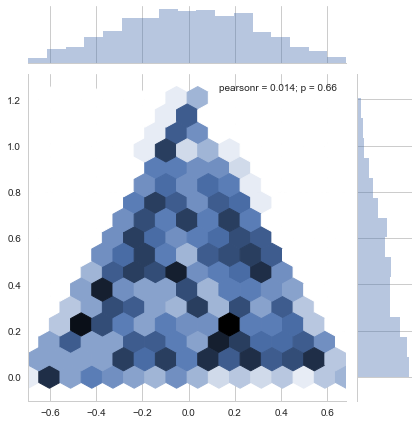

In [10]:
plot_triangle(X2, kind="hex")

#### alpha를 동등하게 할당하지 않으면 특정 위치에 분포가 집중된다.

In [11]:
def project(x):
    n1 = np.array([1, 0, 0])
    n2 = np.array([0, 1, 0])
    n3 = np.array([0, 0, 1])
    n12 = (n1 + n2) / 2
    m1 = np.array([1, -1, 0])
    m2 = n3 - n12
    m1 = m1 / np.linalg.norm(m1)
    m2 = m2 / np.linalg.norm(m2)
    return np.dstack([(x - n12).dot(m1), (x - n12).dot(m2)])[0]


def project_reverse(x):
    n1 = np.array([1, 0, 0])
    n2 = np.array([0, 1, 0])
    n3 = np.array([0, 0, 1])
    n12 = (n1 + n2) / 2
    m1 = np.array([1, -1, 0])
    m2 = n3 - n12
    m1 = m1 / np.linalg.norm(m1)
    m2 = m2 / np.linalg.norm(m2)
    return x[:, 0][:, np.newaxis] * m1 + x[:, 1][:, np.newaxis] * m2 + n12


eps = np.finfo(float).eps * 10
X = project([[1 - eps, 0, 0], [0, 1 - eps, 0], [0, 0, 1 - eps]])

In [12]:
import matplotlib.tri as mtri
triang = mtri.Triangulation(X[:, 0], X[:, 1], [[0, 1, 2]])
refiner = mtri.UniformTriRefiner(triang)
triang2 = refiner.refine_triangulation(subdiv=6)
XYZ = project_reverse(
    np.dstack([triang2.x, triang2.y, 1 - triang2.x - triang2.y])[0])

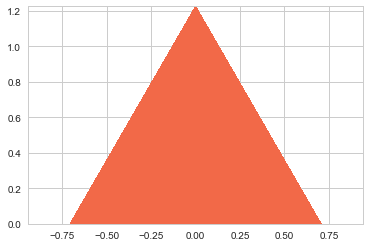

In [14]:
# alpha 값 동일하게 할당한 경우
pdf = sp.stats.dirichlet((1, 1, 1)).pdf(XYZ.T)
plt.tricontourf(triang2, pdf)
plt.axis("equal")
plt.show()

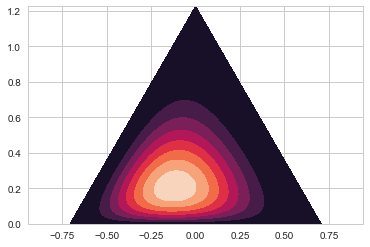

In [17]:
# # alpha 값 동일하게 할당하지 않은 경우
pdf = sp.stats.dirichlet((3, 4, 2)).pdf(XYZ.T)
plt.tricontourf(triang2, pdf)
plt.axis("equal")
plt.show()

#### alpha를 unfair하게 할당하고, 그 값을 높이면 2차 모멘트 값이 커지면서 
#### 특정 위치에서 분포가 치솟는다.(분포가 집중된다.)

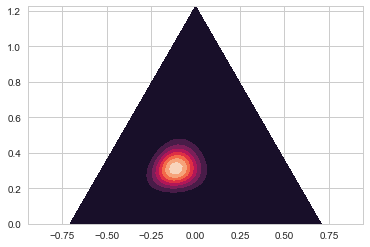

In [16]:
pdf = sp.stats.dirichlet((16, 24, 14)).pdf(XYZ.T)
plt.tricontourf(triang2, pdf)
plt.axis("equal")
plt.show()